<a href="https://colab.research.google.com/github/crsimmons1/lifeexpectancy/blob/master/Classification/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machines**

This file uses support vector machines to classify whether the Total Expenditure (general government expenditure on health as a percentage of total government expenditure (%)) was low or high. The threshold chosen to distinguish low(1)  and high(1) is 5.8%, since it is the median value and keeps the classes balanced.  

This data can be found [here](https://www.kaggle.com/kumarajarshi/life-expectancy-who) on Kaggle. Please see this git [repository](https://github.com/crsimmons1/lifeexpectancy) for more information on the data cleaning that was done. 


## Import the Data

In [0]:
# Import Packages
import pandas as pd
import numpy as np

# Import Unscaled Data
data= pd.read_csv("cleaned_data.csv")

# Split in X and y 
y = pd.DataFrame(data.TExp)
X = data.drop(columns=['TExpenditure', 'Expenditure','TExp', 'Year'])

#Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=33)


## **RBF, Polynomial, and Sigmoid Kernals**

### Initial Models 

In [0]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
kernels = ['Polynomial', 'RBF', 'Sigmoid']

#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")

In [6]:
for i in range(3):
# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
# Make prediction
    y_pred = svclassifier.predict(X_test)
# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.47      1.00      0.64       238

    accuracy                           0.47       507
   macro avg       0.23      0.50      0.32       507
weighted avg       0.22      0.47      0.30       507

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.53      1.00      0.69       269
           1       0.00      0.00      0.00       238

    accuracy                           0.53       507
   macro avg       0.27      0.50      0.35       507
weighted avg       0.28      0.53      0.37       507

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.53      0.99      0.69       269
           1       0.00      0.00      0.00       238

    accuracy                           0.52       507
   macro avg       0.26      0.49      0.34     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Using Grid Search to Hypertune Parameters
### Model 4 - Sigmoid 

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.05, 0.1, 0.5,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['sigmoid']}

In [8]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV] .................. C=0.01, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV] .................. C=0.01, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/val

[CV] .................. C=0.01, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV] .................. C=0.01, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=1, kernel=sigmoid .................................
[CV] .................. C=0.01, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.01, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=0.01, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.01, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=0.01, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=0.01, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=sigmoid ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.01, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=0.01, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=0.01, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=sigmoid .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=0.01, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=0.01, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=0.01, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=1, kernel=sigmoid .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.05, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=1, kernel=sigmoid .................................
[CV] .................. C=0.05, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=1, kernel=sigmoid .................................
[CV] .................. C=0.05, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=1, kernel=sigmoid .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.05, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=1, kernel=sigmoid .................................
[CV] .................. C=0.05, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.05, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.05, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.05, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=sigmoid ...............................
[CV] ................ C=0.05, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.05, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=0.05, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=0.05, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=sigmoid ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.05, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=0.05, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=sigmoid ..............................
[CV] ............... C=0.05, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=sigmoid .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=0.05, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=0.05, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=0.05, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=sigmoid .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. C=0.05, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=0.05, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.5, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.5, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=1, kernel=sigmoid ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.5, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.5, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.5, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=sigmoid ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.5, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.5, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.5, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=sigmoid ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=0.5, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.5, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.5, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.5, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.5, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.5, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.01, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=0.5, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.5, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.5, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=sigmoid ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... C=0.5, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.5, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.5, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.1s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   11.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [9]:
print(grid.best_estimator_)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [11]:
from sklearn import metrics

# Function to evaluate model 
RESULTS = {}
def evaluate_model(y_test, y_train, y_pred_test, y_pred_train):
    return { # First test, then training 
        # Accuracy
        "Accuracy_test" : metrics.accuracy_score(y_test, y_pred_test),
        "Accuracy_train" : metrics.accuracy_score(y_train, y_pred_train),
        # AUC
        "AUC_test" : (metrics.roc_auc_score(y_test, y_pred_test)),
        "AUC_train" : (metrics.roc_auc_score(y_train, y_pred_train)),
        # Average Precision Score
        "AvgPrecision_test": metrics.average_precision_score(y_test, y_pred_test),
        "AvgPrecision_train": metrics.average_precision_score(y_train, y_pred_train),
        # F1 Score, also known as balanced F-score or F-measure
        "F1_test": metrics.f1_score(y_test, y_pred_test),
        "F1_train": metrics.f1_score(y_train, y_pred_train)}

# calculate metrics for the training and test predictions
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
RESULTS["Sigmoid"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

# Output the metrics
pd.DataFrame(RESULTS)

,Sigmoid
AUC_test,0.500000
AUC_train,0.500000
Accuracy_test,0.530572
Accuracy_train,0.506667
AvgPrecision_test,0.469428
AvgPrecision_train,0.493333
F1_test,0.000000
F1_train,0.000000


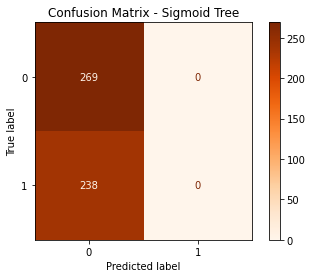

In [13]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(grid, X_test, y_test, values_format='d', cmap='Oranges')
plt.title("Confusion Matrix - Sigmoid Tree")
plt.show()

In [14]:
# Precision, Recall, F1-Score
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69       269
           1       0.00      0.00      0.00       238

    accuracy                           0.53       507
   macro avg       0.27      0.50      0.35       507
weighted avg       0.28      0.53      0.37       507



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 5 - Poly Kernel 

In [0]:
# New parameter grid 
param_grid = {'C': [0.01, 0.05, 0.1, 0.5,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['poly']}

In [17]:
grid2 = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid2.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.01, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.01, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=poly ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/val

[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.01, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.01, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=poly ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ................. C=0.01, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.01, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.01, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.01, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.05, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.05, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.05, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.05, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=1, kernel=poly ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..................... C=0.05, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=1, kernel=poly ....................................
[CV] ..................... C=0.05, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.05, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.05, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.05, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.05, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.1, kernel=poly ..................................
[CV] ................... C=0.05, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=poly .................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .................. C=0.05, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.01, kernel=poly .................................
[CV] .................. C=0.05, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.05, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.05, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.05, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.05, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=poly ................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ................. C=0.05, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=poly ................................
[CV] ................. C=0.05, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.5, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.5, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.5, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.5, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.5, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.5, gamma=1, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.5, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=0.1, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ................... C=0.5, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.5, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.5, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.5, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.5, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=poly .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .................. C=0.5, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.5, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.5, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=0.5, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.5, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] .................... C=10, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.001, kernel=poly ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.1s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.1s


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.6s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [18]:
print(grid2.best_estimator_)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [19]:
# calculate metrics for the training and test predictions
y_pred_train = grid2.predict(X_train)
y_pred_test = grid2.predict(X_test)
RESULTS["Poly"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

# Output the metrics
pd.DataFrame(RESULTS)

,Sigmoid,Poly
Accuracy_test,0.530572,0.560158
Accuracy_train,0.506667,0.539753
AUC_test,0.500000,0.559597
AUC_train,0.500000,0.539592
AvgPrecision_test,0.469428,0.502969
AvgPrecision_train,0.493333,0.514755
F1_test,0.000000,0.540206
F1_train,0.000000,0.530715


### Model 6 - 

In [0]:
param_grid = {'C': [0.01, 0.05, 0.1, 0.5,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf']}

In [21]:
grid3 = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid3.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.01, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.05, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=1, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=0.05, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.05, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=1, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=0.05, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.05, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.05, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.05, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.05, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.05, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.05, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=0.05, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.1, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.05, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.05, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.05, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.05, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.05, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=0.05, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.5, gamma=1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.1, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=0.5, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.5, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.5, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=0.5, gamma=0.001, kernel=rbf ..................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=0.5, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   0.2s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   18.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [22]:
# calculate metrics for the training and test predictions
y_pred_train = grid3.predict(X_train)
y_pred_test = grid3.predict(X_test)
RESULTS["rbf"] = evaluate_model(y_test, y_train, y_pred_test,y_pred_train)

# Output the metrics
pd.DataFrame(RESULTS)

,Sigmoid,Poly,rbf
Accuracy_test,0.530572,0.560158,0.530572
Accuracy_train,0.506667,0.539753,1.000000
AUC_test,0.500000,0.559597,0.500000
AUC_train,0.500000,0.539592,1.000000
AvgPrecision_test,0.469428,0.502969,0.469428
AvgPrecision_train,0.493333,0.514755,1.000000
F1_test,0.000000,0.540206,0.000000
F1_train,0.000000,0.530715,1.000000
